# Markov Chain Stuff

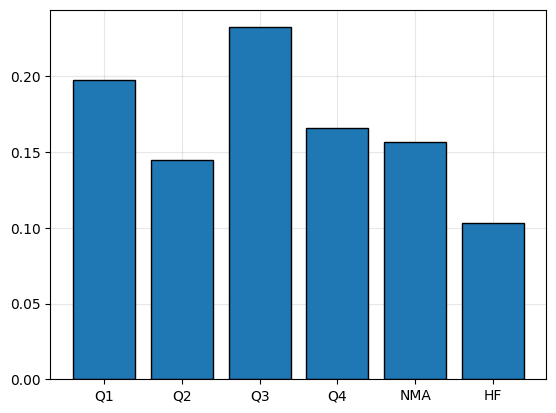

In [59]:
import sys 

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

sys.path.append('../') # wouldn't have to do this if you merge PR #27 
from georules.markov import MarkovSequence


states = ["Q1", "Q2", "Q3", "Q4", "NMA", "HF"]
transition_matrix = np.array([
    [0.1,0.13,0.3,0.15,0.22,0.1],
    [0.3,0.05,0.3,0.15,0.15,0.05],
    [0.3,0.13,0.1,0.15,0.18,0.14],
    [0.25,0.1,0.25,0.09,0.22,0.09],
    [0.05,0.25,0.25,0.25,0.05,0.15],
    [0.15,0.25,0.25,0.25,0.05,0.05]
])
ms = MarkovSequence(states=states, transition_matrix=transition_matrix)

eq_dist = ms.equilibrium_distribution(transition_matrix)

# plot eq distribtuion from matrix
fig, ax = plt.subplots()
ax.bar(x=states, height=eq_dist, ec='k', zorder=2)
ax.grid('True', alpha=0.3)

### Manual calculation of distribution
Obtain the frequencies via a loop, over repeated markov steps it should converge on the equilbirum distirbution 

(array([0.19760262, 0.14459686, 0.23226954, 0.16599405, 0.15646616,
        0.10307077]),
 array([0.19760262, 0.14459686, 0.23226954, 0.16599405, 0.15646616,
        0.10307077]))

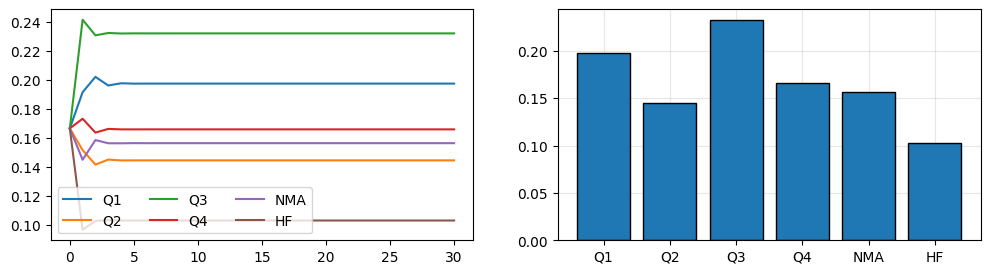

In [62]:
init_state = np.array([1/6]*6)

data = [init_state] 
for i in range(30): 
    data.append(data[-1] @ transition_matrix) 

final_state = data[-1]

# plot
fig, axs = plt.subplots(1,2,figsize=(12,3))
axs = axs.flatten() 


data = pd.DataFrame(data, columns=states)
data.plot(ax=axs[0])
axs[0].legend(loc=3, ncols=len(data.columns)/2)

axs[1].bar(x=states, height=final_state, ec='k', zorder=2)
axs[1].grid('True', alpha=0.3) 

final_state, eq_dist
